In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import stdev, mean
from sklearn.metrics import plot_roc_curve
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
%matplotlib inline
%run dataset_reader.ipynb

# Config

In [2]:
def report_string_to_dict(report):
    report_dict = {}
    metrics = report.split('\n')[0].split()
    for row in report.split('\n')[1:]:
        splitted = row.split()
        if len(splitted) > 4:
            class_name_size = len(splitted[0:-4])
            class_name = " ".join(splitted[0:-4])
            report_dict[class_name] = {}
            for metric_index in range(len(metrics)):
                metric = metrics[metric_index]
                metric_val = splitted[metric_index + class_name_size]
                report_dict[class_name][metric] = metric_val
        elif len(splitted) > 0:
            metric = splitted[0]
            report_dict[metric] = {}
            report_dict[metric][metrics[-2]] = splitted[1]
            report_dict[metric][metrics[-1]] = splitted[2]
    return report_dict

In [3]:
def csv_to_dataframe(csv_name, csv_folder = ""):
    if len(csv_folder) == 0:
        return pd.read_csv(csv_name + ".csv")
    else:
        return pd.read_csv(csv_folder + "/" + csv_name + ".csv")

# Metrics

In [4]:
def get_metrics_avg(csv_name, dataset_name, model_name, folder_name = "", strategy = "", filter_dataset = True):
    df = csv_to_dataframe(csv_name, folder_name)
    
    if filter_dataset:
        df = df.loc[df['dataset'] == dataset_name]
    if len(strategy) > 0:
        df = df.loc[df['phase_strategy'] == strategy]
    if len(model_name) > 0:
        df = df.loc[df['model'] == model_name]
        
    reports_string = df['report'].tolist()
    reports = []
    for report in reports_string:
        reports.append(report_string_to_dict(report))

    accuracy = []
    f1_score = []
    f1_score_weighted = []
    precision = []
    recall = []

    for report in reports:
        accuracy.append(float(report['accuracy']['f1-score']))
        precision.append(float(report['macro avg']['precision']))
        recall.append(float(report['macro avg']['recall']))
        f1_score.append(float(report['macro avg']['f1-score']))
        f1_score_weighted.append(float(report['weighted avg']['f1-score']))

    accuracy_dev = round(stdev(accuracy), 3)
    precision_dev = round(stdev(precision), 3)
    recall_dev = round(stdev(recall), 3)
    f1_score_dev = round(stdev(accuracy), 3)
    f1_score_weighted_dev = round(stdev(accuracy), 3)

    accuracy_avg = round(mean(accuracy), 3)
    precision_avg = round(mean(precision), 3)
    recall_avg = round(mean(recall), 3)
    f1_score_avg = round(mean(f1_score), 3)
    f1_score_weighted_avg = round(mean(f1_score_weighted), 3)

    result = {
        'accuracy': {
            'avg' : accuracy_avg,
            'dev' : accuracy_dev
        },
        'f1_score': {
            'avg' : f1_score_avg,
            'dev' : f1_score_dev
        },
        'precision':{
            'avg' : precision_avg,
            'dev' : precision_dev
        },
        'recall':{
            'avg' : recall_avg,
            'dev' : recall_dev
        },
        'f1_score_weighted': {
            'avg' : f1_score_weighted_avg,
            'dev' : f1_score_weighted_dev
        },
    }

    return result

## **Results**

### **Caesarian**

In [5]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'sf', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.499, 'dev': 0.094},
 'f1_score': {'avg': 0.438, 'dev': 0.094},
 'precision': {'avg': 0.457, 'dev': 0.23},
 'recall': {'avg': 0.539, 'dev': 0.087},
 'f1_score_weighted': {'avg': 0.421, 'dev': 0.094}}

In [6]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'hsgs', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.496, 'dev': 0.071},
 'f1_score': {'avg': 0.414, 'dev': 0.071},
 'precision': {'avg': 0.431, 'dev': 0.228},
 'recall': {'avg': 0.541, 'dev': 0.06},
 'f1_score_weighted': {'avg': 0.394, 'dev': 0.071}}

In [7]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="original")

{'accuracy': {'avg': 0.466, 'dev': 0.073},
 'f1_score': {'avg': 0.356, 'dev': 0.073},
 'precision': {'avg': 0.322, 'dev': 0.191},
 'recall': {'avg': 0.512, 'dev': 0.051},
 'f1_score_weighted': {'avg': 0.334, 'dev': 0.073}}

In [8]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angle")

{'accuracy': {'avg': 0.477, 'dev': 0.072},
 'f1_score': {'avg': 0.366, 'dev': 0.072},
 'precision': {'avg': 0.337, 'dev': 0.212},
 'recall': {'avg': 0.529, 'dev': 0.055},
 'f1_score_weighted': {'avg': 0.341, 'dev': 0.072}}

In [9]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="radius")

{'accuracy': {'avg': 0.47, 'dev': 0.093},
 'f1_score': {'avg': 0.363, 'dev': 0.093},
 'precision': {'avg': 0.309, 'dev': 0.182},
 'recall': {'avg': 0.516, 'dev': 0.087},
 'f1_score_weighted': {'avg': 0.34, 'dev': 0.093}}

In [10]:
get_metrics_avg('experiments_caesarian', 'caesarian.arff', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angleradius")

{'accuracy': {'avg': 0.42, 'dev': 0.06},
 'f1_score': {'avg': 0.311, 'dev': 0.06},
 'precision': {'avg': 0.274, 'dev': 0.139},
 'recall': {'avg': 0.471, 'dev': 0.074},
 'f1_score_weighted': {'avg': 0.285, 'dev': 0.06}}

In [11]:
get_metrics_avg('classic_models_results', 'caesarian.arff', 'mlp', folder_name='results')

{'accuracy': {'avg': 0.571, 'dev': 0.069},
 'f1_score': {'avg': 0.425, 'dev': 0.069},
 'precision': {'avg': 0.37, 'dev': 0.181},
 'recall': {'avg': 0.538, 'dev': 0.083},
 'f1_score_weighted': {'avg': 0.449, 'dev': 0.069}}

In [12]:
get_metrics_avg('classic_models_results', 'caesarian.arff', 'perceptron', folder_name='results')

{'accuracy': {'avg': 0.535, 'dev': 0.065},
 'f1_score': {'avg': 0.393, 'dev': 0.065},
 'precision': {'avg': 0.367, 'dev': 0.197},
 'recall': {'avg': 0.53, 'dev': 0.059},
 'f1_score_weighted': {'avg': 0.402, 'dev': 0.065}}

### **Breast Tissue**

### **1 Neuron**

In [13]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'sf', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.25, 'dev': 0.023},
 'f1_score': {'avg': 0.225, 'dev': 0.023},
 'precision': {'avg': 0.295, 'dev': 0.03},
 'recall': {'avg': 0.24, 'dev': 0.023},
 'f1_score_weighted': {'avg': 0.225, 'dev': 0.023}}

In [14]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'hsgs', folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.234, 'dev': 0.028},
 'f1_score': {'avg': 0.151, 'dev': 0.028},
 'precision': {'avg': 0.146, 'dev': 0.102},
 'recall': {'avg': 0.224, 'dev': 0.026},
 'f1_score_weighted': {'avg': 0.155, 'dev': 0.028}}

In [15]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="original")

{'accuracy': {'avg': 0.165, 'dev': 0.052},
 'f1_score': {'avg': 0.056, 'dev': 0.052},
 'precision': {'avg': 0.035, 'dev': 0.021},
 'recall': {'avg': 0.163, 'dev': 0.055},
 'f1_score_weighted': {'avg': 0.061, 'dev': 0.052}}

In [16]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angle")

{'accuracy': {'avg': 0.169, 'dev': 0.032},
 'f1_score': {'avg': 0.059, 'dev': 0.032},
 'precision': {'avg': 0.037, 'dev': 0.018},
 'recall': {'avg': 0.165, 'dev': 0.023},
 'f1_score_weighted': {'avg': 0.064, 'dev': 0.032}}

In [17]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="radius")

{'accuracy': {'avg': 0.181, 'dev': 0.065},
 'f1_score': {'avg': 0.075, 'dev': 0.065},
 'precision': {'avg': 0.048, 'dev': 0.029},
 'recall': {'avg': 0.189, 'dev': 0.07},
 'f1_score_weighted': {'avg': 0.075, 'dev': 0.065}}

In [18]:
get_metrics_avg('experiments_breast_tissue_1_neuronio', 'breast_tissue_data.csv', 'phase-encoding', folder_name='results', filter_dataset=False, strategy="angleradius")

{'accuracy': {'avg': 0.11, 'dev': 0.076},
 'f1_score': {'avg': 0.051, 'dev': 0.076},
 'precision': {'avg': 0.04, 'dev': 0.045},
 'recall': {'avg': 0.119, 'dev': 0.084},
 'f1_score_weighted': {'avg': 0.048, 'dev': 0.076}}

In [19]:
get_metrics_avg('classic_models_results', 'breast_tissue_data.csv', 'mlp', folder_name='results')

{'accuracy': {'avg': 0.321, 'dev': 0.13},
 'f1_score': {'avg': 0.187, 'dev': 0.13},
 'precision': {'avg': 0.177, 'dev': 0.146},
 'recall': {'avg': 0.297, 'dev': 0.127},
 'f1_score_weighted': {'avg': 0.209, 'dev': 0.13}}

In [20]:
get_metrics_avg('classic_models_results', 'breast_tissue_data.csv', 'perceptron', folder_name='results')

{'accuracy': {'avg': 0.318, 'dev': 0.097},
 'f1_score': {'avg': 0.17, 'dev': 0.097},
 'precision': {'avg': 0.178, 'dev': 0.179},
 'recall': {'avg': 0.273, 'dev': 0.112},
 'f1_score_weighted': {'avg': 0.203, 'dev': 0.097}}

### **Multiple Neurons**

In [21]:
get_metrics_avg('experiments_breast_tissue_multi_neuronios', 'breast_tissue_data.csv', model_name = "sf", folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.23, 'dev': 0.0},
 'f1_score': {'avg': 0.06, 'dev': 0.0},
 'precision': {'avg': 0.04, 'dev': 0.0},
 'recall': {'avg': 0.17, 'dev': 0.0},
 'f1_score_weighted': {'avg': 0.08, 'dev': 0.0}}

In [22]:
get_metrics_avg('experiments_breast_tissue_multi_neuronios', 'breast_tissue_data.csv', model_name = "hsgs", folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.23, 'dev': 0.0},
 'f1_score': {'avg': 0.06, 'dev': 0.0},
 'precision': {'avg': 0.04, 'dev': 0.0},
 'recall': {'avg': 0.17, 'dev': 0.0},
 'f1_score_weighted': {'avg': 0.08, 'dev': 0.0}}

In [23]:
get_metrics_avg('experiments_breast_tissue_multi_neuronios', 'breast_tissue_data.csv', model_name = "phase-encoding", folder_name='results', filter_dataset=False)

{'accuracy': {'avg': 0.14, 'dev': 0.0},
 'f1_score': {'avg': 0.04, 'dev': 0.0},
 'precision': {'avg': 0.02, 'dev': 0.0},
 'recall': {'avg': 0.17, 'dev': 0.0},
 'f1_score_weighted': {'avg': 0.03, 'dev': 0.0}}

# RoC Curve

In [24]:
def get_tp_and_fp_ratio_from_csv(csv_name, folder_name, model, strategy, learning_rate, bias):
    df = csv_to_dataframe(csv_name, folder_name)
    df = df.loc[df['phase_strategy'] == strategy]
    df = df.loc[df['model'] == model]
    df = df.loc[df['bias'] == bias]
    df = df.loc[df['lr'] == learning_rate]

    ratios = {
            'tp': [],
            'fp': []
        }

    # The confusion matrix is like:
    # 0: a b
    # 1: c d
    # and I'm doing:
    # true positive = d / (c + d)
    # false positive = 1 - true positive ratio

    for matrix_str in df['matrix']:
        matrix_str = matrix_str.replace("[", "")
        matrix_str = matrix_str.replace("]", "")

        matrix = []
        for line in matrix_str.split('\n'):
            matrix.append([])
            for element in line.strip().split():
                matrix[-1].append(int(element))
        tp_ratio = round(matrix[1][1]/(matrix[1][1] + matrix[1][0]), 3)
        ratios['tp'].append(tp_ratio)
        ratios['fp'].append(1 - tp_ratio)
    return ratios

In [25]:
def plot_roc_for_classic_models():
    caesarian_x, caesarian_y = get_splitted_and_normalized_dataset(CAESARIAN)
    X_train, X_test, y_train, y_test = train_test_split(caesarian_x, caesarian_y, stratify=caesarian_y, random_state=0, test_size = 0.2)

    perceptron = Perceptron(penalty = 'l1',
                                    max_iter = 20,
                                    alpha=0.02)
    perceptron = perceptron.fit(X_train, y_train)

    mlp = MLPClassifier(hidden_layer_sizes = [8, 16, 2],
                                        activation = 'relu',
                                        solver = 'sgd',
                                        learning_rate = 'constant',
                                        learning_rate_init = 0.02,
                                        max_iter = 20)
    mlp = mlp.fit(X_train, y_train)

    fig = plot_roc_curve(perceptron, X_test, y_test)
    plot_roc_curve(mlp, X_test, y_test, ax = fig.ax_)

In [26]:
def plot_roc(ratios_and_labels, filename = ""):
    plot_roc_for_classic_models()
    plot = plt
    plot.title('Receiver Operating Characteristic')
    line_index = 0
    linestyles = [
        '-',
        '--',
        '-.',
        ':',
        'solid',
        'dashed',
        'dashdot',
        'dotted'
        ]
    for ratio_and_label in ratios_and_labels:
        tp_ratios = ratio_and_label[0]['tp']
        fp_ratios = ratio_and_label[0]['fp']
        plot.plot(fp_ratios, tp_ratios, label=ratio_and_label[1], linestyle=linestyles[line_index])
        line_index += 1
    plot.legend(loc='upper right')
    plot.xlim([0, 1])
    plot.ylim([0, 1])
    plot.ylabel('True Positive Rate')
    plot.xlabel('False Positive Rate')
    if len(filename) > 0:
        plot.savefig(filename)

## Caesarian

{'tp': [0.444, 0.556, 0.0], 'fp': [0.556, 0.44399999999999995, 1.0]}
{'tp': [0.333, 0.556, 0.111, 0.0], 'fp': [0.667, 0.44399999999999995, 0.889, 1.0]}
{'tp': [0.111, 0.0, 0.0, 0.0], 'fp': [0.889, 1.0, 1.0, 1.0]}
{'tp': [0.0, 0.0, 0.0, 0.0], 'fp': [1.0, 1.0, 1.0, 1.0]}
{'tp': [0.0, 0.0, 0.0, 0.0], 'fp': [1.0, 1.0, 1.0, 1.0]}
{'tp': [0.222, 0.0, 0.0, 0.0], 'fp': [0.778, 1.0, 1.0, 1.0]}


C:\Users\Eduardo Barreto\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


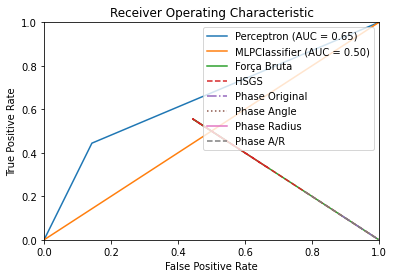

In [27]:
phase_original = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 'phase-encoding', 'original', 0.02, False)
phase_angle = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 'phase-encoding', 'angle', 0.02, False)
phase_radius = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 'phase-encoding', 'radius', 0.02, False)
phase_angle_radius = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 'phase-encoding', 'angleradius', 0.02, False)
hsgs = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 'hsgs', 'original', 0.02, False)
sf = get_tp_and_fp_ratio_from_csv('experiments_caesarian', 'results', 'sf', 'original', 0.02, False)

print(sf)
print(hsgs)
print(phase_original)
print(phase_angle)
print(phase_radius)
print(phase_angle_radius)

models_array = [
    [sf, 'Força Bruta'],
    [hsgs, 'HSGS'],
    [phase_original, 'Phase Original'],
    [phase_angle, 'Phase Angle'],
    [phase_radius, 'Phase Radius'],
    [phase_angle_radius, 'Phase A/R']
    ]

plot_roc(models_array, "results/caesarian_roc.png")